In [1]:
import pandas as pd
import numpy as np 
import math as mt

### Usando os dados da EmpregadosCompanhiaMB, construa a distribuição de freqüências das variáveis:

In [2]:
dados = pd.read_csv("Dados/EmpregadosCompanhiaMB.csv", sep=";")

In [3]:
dados.head()

,N,EstadoCivil,GrauInstrucao,Nfilhos,Salario(xSalMin),AnosIdade,MesesIdade,RegiaoProcedencia
0,1,solteiro,ensino fundamental,0,4,26,3,interior
1,2,casado,ensino fundamental,1,"4,56",32,10,capital
2,3,casado,ensino fundamental,2,"5,25",36,5,capital
3,4,solteiro,ensino médio,0,"5,73",20,10,outra
4,5,solteiro,ensino fundamental,0,"6,26",40,7,outra


In [4]:
dados.dtypes

N                     int64
EstadoCivil          object
GrauInstrucao        object
Nfilhos               int64
Salario(xSalMin)     object
AnosIdade             int64
MesesIdade            int64
RegiaoProcedencia    object
dtype: object

#### EstadoCivil

In [5]:
#Fazendo a coluna da frequência absoluta
freq_table = pd.crosstab(dados['EstadoCivil'], 'FreqAbsoluta')

#Fazendo a coluna da frequência relativa, dividindo a coluna FreqAbsoluta pelo tamanho
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 

#Fazendo a linha com os totais
freq_table.loc['Total'] = freq_table.sum(axis=0)

#Alterando a coluna FreqAbsoluta do tipo float para inteiro (só para ficar mais bonitinho)
freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)

freq_table

col_0,FreqAbsoluta,FreqRelativa
EstadoCivil,,
casado,20,0.555556
solteiro,16,0.444444
Total,36,1.000000


#### RegiaoProcedencia

In [6]:
freq_table = pd.crosstab(dados['RegiaoProcedencia'], 'FreqAbsoluta')
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 
freq_table.loc['Total'] = freq_table.sum(axis=0)

freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)

freq_table

col_0,FreqAbsoluta,FreqRelativa
RegiaoProcedencia,,
capital,11,0.305556
interior,12,0.333333
outra,13,0.361111
Total,36,1.000000


#### Nfilhos

In [7]:
freq_table = pd.crosstab(dados['Nfilhos'], 'FreqAbsoluta')
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 
freq_table.loc['Total'] = freq_table.sum(axis=0)

freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)

freq_table

col_0,FreqAbsoluta,FreqRelativa
Nfilhos,,
0,20,0.555556
1,5,0.138889
2,7,0.194444
3,3,0.083333
5,1,0.027778
Total,36,1.000000


#### AnosIdade

In [8]:
freq_table = pd.crosstab(dados['AnosIdade'], 'FreqAbsoluta')
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 
freq_table.loc['Total'] = freq_table.sum(axis=0)

freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)

freq_table

col_0,FreqAbsoluta,FreqRelativa
AnosIdade,,
20,1,0.027778
23,1,0.027778
25,1,0.027778
26,2,0.055556
27,1,0.027778
28,1,0.027778
29,1,0.027778
30,2,0.055556
31,2,0.055556


#### Aqui existe um número de classes bem alto(48) então seria interessante fazer novas classes divididas por intervalos. 

In [9]:
#saber a quantidade de faixas necessarias, através da raiz e arrendodar caso necessário
qtdFaixas = mt.ceil(np.sqrt(len(dados)))

#pegar o minimo e maximo, aqui eu preferi deixa os números fechadinhos(arrendondei o min para baixo e o max para cima) 
#ex:48 eu arredondei para 50
#o minimo não precisava fazer arredondamento nesse caso(já esta 20), mas já deixei caso necessite para outros códigos no futuro.
minimo=np.amin(dados['AnosIdade'])-(np.amin(dados['AnosIdade'])%10)
maximo=np.amax(dados['AnosIdade'])+(10-(np.amax(dados['AnosIdade'])%10))

#defini o tamanho de cada faixa pegando a amplitude(max-min) e dividindo pela quantidade de faixas                
tamanhoIntervalo = mt.ceil((maximo-minimo)/qtdFaixas)
           
bins=[]
soma = minimo

for i in range(qtdFaixas+1):
    
    bins.append(soma)
    soma=soma+tamanhoIntervalo
 
#peguei as idades e classifiquei em uma nova tabela
idades = []
for i in dados['AnosIdade']:
    idades.append(i)


classificacao = pd.DataFrame(idades, columns=['Idade'])

classificacao['Intervalo'] = pd.cut(classificacao['Idade'], bins, include_lowest = True)

#Aqui segui que estava fazendo em outras tabelas
freq_table = pd.crosstab(classificacao['Intervalo'], 'FreqAbsoluta')
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 
freq_table.loc['Total'] = freq_table.sum(axis=0)

freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)


freq_table

col_0,FreqAbsoluta,FreqRelativa
Intervalo,,
"(19.999, 25.0]",3,0.083333
"(25.0, 30.0]",7,0.194444
"(30.0, 35.0]",10,0.277778
"(35.0, 40.0]",8,0.222222
"(40.0, 45.0]",6,0.166667
"(45.0, 50.0]",2,0.055556
Total,36,1.000000


In [10]:
#Outra forma mais curta é pegando a apenas a raiz e deixando que faça as bins(classes) sozinho.
bins= mt.ceil(np.sqrt(len(dados)))

idades = []
for i in dados['AnosIdade']:
    idades.append(i)


classificacao = pd.DataFrame(idades, columns=['Idade'])

classificacao['Intervalo'] = pd.cut(classificacao['Idade'], bins, include_lowest = True)


freq_table = pd.crosstab(classificacao['Intervalo'], 'FreqAbsoluta')
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 
freq_table.loc['Total'] = freq_table.sum(axis=0)

freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)

freq_table

col_0,FreqAbsoluta,FreqRelativa
Intervalo,,
"(19.971, 24.667]",2,0.055556
"(24.667, 29.333]",6,0.166667
"(29.333, 34.0]",10,0.277778
"(34.0, 38.667]",7,0.194444
"(38.667, 43.333]",8,0.222222
"(43.333, 48.0]",3,0.083333
Total,36,1.000000


### Para o Conjunto de Dados 1 (CD-Brasil), construa a distribuição de freqüências para as variáveis população urbana e densidade populacional.

In [11]:
dados = pd.read_csv("Dados/CD-Brasil.csv", sep=";")

In [12]:
dados.head()

,Regiao,Estado,Superficie,Populacao,Densidade
0,Norte,RO,"237.576,167",1.453.756,"6,12"
1,Norte,AC,"164.165,250",653.385,"3,98"
2,Norte,AM,"1.559.161,810",3.221.940,"2,07"
3,Norte,RR,"224.298,980",395.725,"1,76"
4,Norte,PA,"1.247.689,515",7.065.573,"5,66"


In [13]:
dados.dtypes

Regiao        object
Estado        object
Superficie    object
Populacao     object
Densidade     object
dtype: object

In [14]:
dados['Superficie']= dados['Superficie'].str.replace('.','')
dados['Superficie'] = dados['Superficie'].str.replace(',','.')

In [15]:
dados['Superficie'] = dados['Superficie'].astype(float)

####  população urbana

In [16]:
dados['Populacao']= dados['Populacao'].str.replace('.','')

In [17]:
dados['Populacao'] = dados['Populacao'].astype(int)

In [18]:
dados.dtypes

Regiao         object
Estado         object
Superficie    float64
Populacao       int32
Densidade      object
dtype: object

In [19]:
dados.head()

,Regiao,Estado,Superficie,Populacao,Densidade
0,Norte,RO,237576.167,1453756,"6,12"
1,Norte,AC,164165.250,653385,"3,98"
2,Norte,AM,1559161.810,3221940,"2,07"
3,Norte,RR,224298.980,395725,"1,76"
4,Norte,PA,1247689.515,7065573,"5,66"


In [20]:
regiao = dados.groupby(['Regiao']).size()
regiao

Regiao
Centro-Oeste    4
Nordeste        9
Norte           7
Sudeste         4
Sul             3
dtype: int64

In [21]:
len(dados)

qtdFaixas= mt.ceil(np.sqrt(len(dados)))



##### Aqui da maneira que fiz as outras atividades ia ficar com intervalos vazios(pois existem grandes saltos de população de um estado para outro), então preferi elabora intervalo de maneira que não ficassem intervalos vazios e nem intervalos com um grande quantidade.

In [22]:
#Apenas para saber uma quantidade de faixas adequada.
qtdFaixas = mt.ceil(np.sqrt(len(dados)))

bins=[350000, 1400000, 2500000, 3250000, 6000000, 11000000,40000000]

populacoes = []
for i in dados['Populacao']:
    populacoes.append(i)

classificacao = pd.DataFrame(populacoes, columns=['Populacao'])
classificacao['Intervalo'] = pd.cut(classificacao['Populacao'], bins, include_lowest = True)

#Renomeando as categorias
classificacao['Intervalo'] = classificacao['Intervalo'].astype(str)
classificacao.loc[classificacao['Intervalo'] ==  '(349999.999, 1400000.0]', 'Intervalo'] = "Até 1400000"
classificacao.loc[classificacao['Intervalo'] ==  '(1400000.0, 2500000.0]', 'Intervalo'] = "Igual ou maior que 1400000 e menor 2500000"
classificacao.loc[classificacao['Intervalo'] ==  '(2500000.0, 3250000.0]', 'Intervalo'] = "Igual ou maior que 2500000 e menor 3250000"
classificacao.loc[classificacao['Intervalo'] ==  '(3250000.0, 6000000.0]', 'Intervalo'] = "Igual ou maior que 3250000 e menor 6000000"
classificacao.loc[classificacao['Intervalo'] ==  '(6000000.0, 11000000.0]', 'Intervalo'] = "Igual ou maior que 6000000 e menor 11000000"
classificacao.loc[classificacao['Intervalo'] ==  '(11000000.0, 40000000.0]', 'Intervalo'] = "Maior ou igual que 11000000"

freq_table = pd.crosstab(classificacao['Intervalo'], 'FreqAbsoluta')
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 
freq_table.loc['Total'] = freq_table.sum(axis=0)

freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)
      
freq_table

col_0,FreqAbsoluta,FreqRelativa
Intervalo,,
Até 1400000,4,0.148148
Igual ou maior que 1400000 e menor 2500000,4,0.148148
Igual ou maior que 2500000 e menor 3250000,5,0.185185
Igual ou maior que 3250000 e menor 6000000,4,0.148148
Igual ou maior que 6000000 e menor 11000000,6,0.222222
Maior ou igual que 11000000,4,0.148148
Total,27,1.000000


####  densidade populacional

In [23]:
dados['Densidade']= dados['Densidade'].str.replace(',','.')

In [24]:
dados['Densidade'] = dados['Densidade'].astype(float)

In [25]:
dados.dtypes

Regiao         object
Estado         object
Superficie    float64
Populacao       int32
Densidade     float64
dtype: object

In [26]:
dados.head()

,Regiao,Estado,Superficie,Populacao,Densidade
0,Norte,RO,237576.167,1453756,6.12
1,Norte,AC,164165.250,653385,3.98
2,Norte,AM,1559161.810,3221940,2.07
3,Norte,RR,224298.980,395725,1.76
4,Norte,PA,1247689.515,7065573,5.66


In [27]:
bins=[1.70, 20.0, 40.0, 60.0, 80.0, 100, 450.0]

densidades = []
for i in dados['Densidade']:
    densidades.append(i)


classificacao = pd.DataFrame(densidades, columns=['Densidade'])
classificacao['Intervalo'] = pd.cut(classificacao['Densidade'], bins, include_lowest = True)

classificacao['Intervalo'] = classificacao['Intervalo'].astype(str)
classificacao.loc[classificacao['Intervalo'] ==  '(1.699, 20.0]', 'Intervalo'] = "Até 20.0"
classificacao.loc[classificacao['Intervalo'] ==  '(20.0, 40.0]', 'Intervalo'] = "Igual ou maior que 20.0 e menor 40.0"
classificacao.loc[classificacao['Intervalo'] ==  '(40.0, 60.0]', 'Intervalo'] = "Igual ou maior que 40.0 e menor 60.0"
classificacao.loc[classificacao['Intervalo'] ==  '(60.0, 80.0]', 'Intervalo'] = "Igual ou maior que 60.0 e menor 80.0"
classificacao.loc[classificacao['Intervalo'] ==  '(80.0, 100.0]', 'Intervalo'] = "Igual ou maior que 80.0 e menor 100.0"
classificacao.loc[classificacao['Intervalo'] ==  '(100.0, 450.0]', 'Intervalo'] = "Maior ou igual que 100.0"

freq_table = pd.crosstab(classificacao['Intervalo'], 'FreqAbsoluta')
freq_table['FreqRelativa'] = freq_table['FreqAbsoluta']/len(dados) 
freq_table.loc['Total'] = freq_table.sum(axis=0)

freq_table['FreqAbsoluta'] = freq_table['FreqAbsoluta'].astype(int)
      
freq_table

col_0,FreqAbsoluta,FreqRelativa
Intervalo,,
Até 20.0,12,0.444444
Igual ou maior que 20.0 e menor 40.0,3,0.111111
Igual ou maior que 40.0 e menor 60.0,3,0.111111
Igual ou maior que 60.0 e menor 80.0,3,0.111111
Igual ou maior que 80.0 e menor 100.0,2,0.074074
Maior ou igual que 100.0,4,0.148148
Total,27,1.000000


### Contou-se o número de erros de impressão da primeira página de um jornal durante 50 dias, obtendo-se os resultados abaixo:
                                 8 11  8 12 14 13 11 14 14 15
                                 6 10 14 19  6 12  7  5  8  8
                                10 16 10 12 12  8 11  6  7 12
                                 7 10 14  5 12  7  9 12 11  9
                                14  8 14  8 12 10 12 22  7 15


In [28]:
dados = [ 8, 11, 8, 12, 14, 13, 11, 14, 14, 15, 6, 10, 14, 19, 6, 12, 7, 5, 8, 8, 10, 16, 10, 12, 12,
         8, 11, 6, 7, 12, 7, 10, 14, 5, 12, 7, 9, 12, 11, 9, 14, 8, 14, 8, 12, 10, 12, 22, 7, 15]

len(dados)

50

##### Coloquei dados num dataframe e dei umas groupby para saber saber os dias que tiveram a mesma quantidade de erros. ex: dos 50 dias analisados houveram 2 dias em que ocorreram 5 erros

In [29]:
erros = pd.DataFrame(dados, columns=['NErros'])
dtbDias = erros.groupby(['NErros']).size()
dtbDias

NErros
5     2
6     3
7     5
8     7
9     2
10    5
11    4
12    9
13    1
14    7
15    2
16    1
19    1
22    1
dtype: int64

##### Fiz uma tabela de frequência só observar melhor as ocorrencias de erros e a frequência relativa

In [30]:
freq_table = pd.crosstab( dados, 'QtdDias')
freq_table['NErros'] = freq_table.index
freq_table['FreqRelativa'] = freq_table['QtdDias']/len(dados) 

freq_table

col_0,QtdDias,NErros,FreqRelativa
row_0,,,
5,2,5,0.04
6,3,6,0.06
7,5,7,0.10
8,7,8,0.14
9,2,9,0.04
10,5,10,0.10
11,4,11,0.08
12,9,12,0.18
13,1,13,0.02


#### Represente os dados graficamente.


##### Fiz um diagramas de barras em que x= número de erros y=  número de dias com essa quantidade de erros

<Axes: xlabel='NErros'>

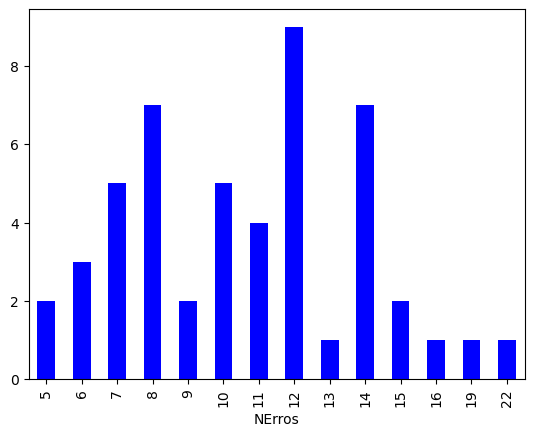

In [31]:
dtbDias.plot.bar(color = 'blue')

#### Faça um histograma e um ramo-e-folhas.